<a href="https://colab.research.google.com/github/hASEEBjAN/TensorFlow_Random_Programs/blob/master/GA_and_Ant_and_combination_of_it.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np, random, operator, pandas as pd, matplotlib.pyplot as plt
#import time
#import collections
class City:
    def __init__(self, x, y,cityNo):
        self.x = x
        self.y = y
        # pass city number as well#TA
        self.cityNo = cityNo
    
    def distance(self, city):
        xDis = abs(self.x - city.x)
        yDis = abs(self.y - city.y)
        distance = np.sqrt((xDis ** 2) + (yDis ** 2))
       # print distance
        return distance
    
    def __repr__(self):
        return "(" + str(self.x) + "," + str(self.y) +"," + str(self.cityNo) +  ")"
class fitness:
    def __init__(self,route):
        self.route=route
        self.distance=0
        self.fitness=0.0
    def routeDistance(self):
        if self.distance==0:
            pathDistance=0
            for i in range(0,len(self.route)):
                fromCity=self.route[i]
                toCity=None
                if i+1<len(self.route):
                    toCity=self.route[i+1]
                else:
                    toCity=self.route[0]
                pathDistance+=fromCity.distance(toCity)
            self.distance=pathDistance
            #print('pathDistance:',pathDistance)
        return self.distance
    def routeFitness(self):
        if self.fitness==0:
            self.fitness=1/float(self.routeDistance())
        return self.fitness
    


def createRoute(cityList):
    route = random.sample(cityList, len(cityList))
    #print ('route:',route)
    return route
def initialPopulation(popSize, cityList):
    population = []

    for i in range(0, popSize):
        population.append(createRoute(cityList))
        #print population
    return population


def rankRoutes(population):
    fitnessResults = {}
    for i in range(0,len(population)):
        fitnessResults[i] = fitness(population[i]).routeFitness()
    return sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse = True)
def selection(popRanked, eliteSize):
    selectionResults = []
    df = pd.DataFrame(np.array(popRanked), columns=["Index","Fitness"])
    df['cum_sum'] = df.Fitness.cumsum()
    df['cum_perc'] = 100*df.cum_sum/df.Fitness.sum()
    
    for i in range(0, eliteSize):
        selectionResults.append(popRanked[i][0])
    for i in range(0, len(popRanked) - eliteSize):
        pick = 100*random.random()
        for i in range(0, len(popRanked)):
            if pick <= df.iat[i,3]:
                selectionResults.append(popRanked[i][0])
                break
    #print('selectionResults:',selectionResults)
    return selectionResults
def matingPool(population, selectionResults):
    matingpool = []
    for i in range(0, len(selectionResults)):
        index = selectionResults[i]
        matingpool.append(population[index])
    return matingpool
def crossover(parent1, parent2):
    #print parent1
    child = []
    childP1 = []
    childP2 = []
    
    geneA = int(random.random() * len(parent1))
    geneB = int(random.random() * len(parent1))
    
    startGene = min(geneA, geneB)
    endGene = max(geneA, geneB)

    for i in range(startGene, endGene):
        childP1.append(parent1[i])
        
    childP2 = [item for item in parent2 if item not in childP1]
    child = childP1 + childP2
    #print child
    return child
def crossoverPopulation(matingpool, eliteSize):
    children = []
    length = len(matingpool) - eliteSize
    pool = random.sample(matingpool, len(matingpool))

    for i in range(0,eliteSize):
        children.append(matingpool[i])
    
    for i in range(0, length):
        child = crossover(pool[i], pool[len(matingpool)-i-1])
        children.append(child)
    #print('children:',children)
    return children
def mutate(individual, mutationRate):
    for swapped in range(len(individual)):
        if(random.random() < mutationRate):
            swapWith = int(random.random() * len(individual))
            city1 = individual[swapped]
            city2 = individual[swapWith]
            
            individual[swapped] = city2
            individual[swapWith] = city1
    return individual
#Next, we can extend the mutate function to run through the new population.
def mutatePopulation(population, mutationRate):
    mutatedPop = []
    
    for ind in range(0, len(population)):
        mutatedInd = mutate(population[ind], mutationRate)
        #print population[ind]
        mutatedPop.append(mutatedInd)
    #print mutatedPop
    return mutatedPop
def nextGeneration(currentGen, eliteSize, mutationRate):
    popRanked = rankRoutes(currentGen)
    selectionResults = selection(popRanked, eliteSize)
    matingpool = matingPool(currentGen, selectionResults)
    children = crossoverPopulation(matingpool, eliteSize)
    nextGeneration = mutatePopulation(children, mutationRate)
    return nextGeneration
def geneticAlgorithm(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population)#we capture the initial distance
    print("Initial distance: " + str(1 / rankRoutes(pop)[0][1]))
    
    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
    
    print("Final distance: " + str(1 / rankRoutes(pop)[0][1]))#final distance
    bestRouteIndex = rankRoutes(pop)[0][0]#best distance
    bestRoute = pop[bestRouteIndex]
    # make route with city number and implement it using the original bestRoute array #TA
    bestRouteCity = [] #TA
    for city in bestRoute:#TA
        cityObject = (city.cityNo)#TA
        bestRouteCity.append(cityObject)#TA
    # append the first city in the route to the route itself to start again #TA
    bestRoute.append(bestRoute[0])#TA
    bestRouteCity.append(bestRouteCity[0])#TA
    #print(' bestRoute:',bestRoute)
    print(' bestRoute by city number: ',bestRouteCity)#TA
    return bestRoute




def geneticAlgorithmPlot(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population)
    progress = []
    progress.append(1 / rankRoutes(pop)[0][1])
    
    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
        progress.append(1 / rankRoutes(pop)[0][1])
    
    plt.plot(progress)
    plt.ylabel('Distance')
    plt.xlabel('Generation')
    plt.show()


cityList = []
df = pd.ExcelFile('Core X,Y.xls').parse('Sheet1', namecity=0) # reads file
df.index = df.index.map(int)
b=[tuple(x) for x in df.to_records(index=False)]
#print b
for city1 in b:
    cityList.append(City(city1[1],city1[2],city1[0]))#TA
#print cityList
from scipy.spatial.distance import squareform, pdist # find matrix of distance
#pd.DataFrame(squareform(pdist(df.iloc[:, 1:])), columns=df.numberOfCities.unique(), index=df.numberOfCities.unique())
m=pd.DataFrame(squareform(pdist(df.iloc[:, 1:])), columns=df.numberOfCities.unique(), index=df.numberOfCities.unique())
#print m 
for i in df["numberOfCities"]:
    for j in df["numberOfCities"]:
        row = df[df["numberOfCities"] == j][["self.x=x", "self.y=y"]]
        latitude = row["self.x=x"].tolist()[0]
        longitude = row["self.y=y"].tolist()[0]
        df.loc[df['numberOfCities'] == i, j] = ((df["self.x=x"] - latitude)**2 + (df["self.y=y"] - longitude)**2)**0.5

df = df.drop(["numberOfCities", "self.x=x", "self.y=y"], axis=1)

#for i in range(0,25):
#   cityList.append(City(x=int(random.random() * 200), y=int(random.random() * 200)))
geneticAlgorithm(population=cityList, popSize=8, eliteSize=4, mutationRate=0.01, generations=10)
geneticAlgorithmPlot(population=cityList, popSize=8, eliteSize=4, mutationRate=0.01, generations=10)


Started : ACS
Ended : ACS
Sequence : <- 9 - 4 - 1 - 7 - 10 - 6 - 8 - 5 - 2 - 3 ->
Total distance travelled to complete the tour : 7.7



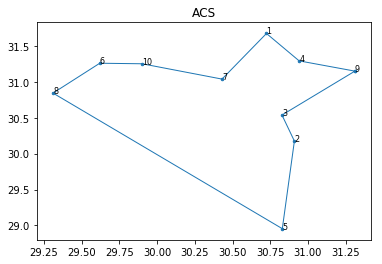

Started : Elitist
Ended : Elitist
Sequence : <- 8 - 6 - 10 - 7 - 1 - 4 - 9 - 3 - 2 - 5 ->
Total distance travelled to complete the tour : 7.7



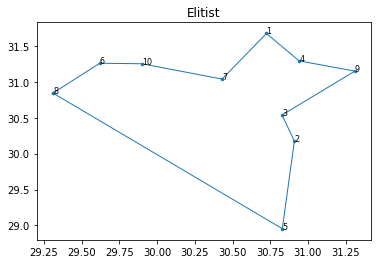

Started : MaxMin
Ended : MaxMin
Sequence : <- 9 - 4 - 1 - 7 - 10 - 6 - 8 - 5 - 2 - 3 ->
Total distance travelled to complete the tour : 7.7



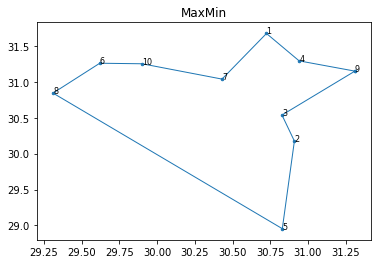

<Figure size 432x288 with 0 Axes>

In [ ]:
import math
import random
import pandas as pd
from matplotlib import pyplot as plt


class SolveTSPUsingACO:
    class Edge:
        def __init__(self, a, b, weight, initial_pheromone):
            self.a = a
            self.b = b
            self.weight = weight
            self.pheromone = initial_pheromone

    class Ant:
        def __init__(self, alpha, beta, num_nodes, edges):
            self.alpha = alpha
            self.beta = beta
            self.num_nodes = num_nodes
            self.edges = edges
            self.tour = None
            self.distance = 0.0

        def _select_node(self):
            roulette_wheel = 0.0
            unvisited_nodes = [node for node in range(self.num_nodes) if node not in self.tour]
            heuristic_total = 0.0
            for unvisited_node in unvisited_nodes:
                heuristic_total += self.edges[self.tour[-1]][unvisited_node].weight
            for unvisited_node in unvisited_nodes:
                roulette_wheel += pow(self.edges[self.tour[-1]][unvisited_node].pheromone, self.alpha) * \
                                  pow((heuristic_total / self.edges[self.tour[-1]][unvisited_node].weight), self.beta)
            random_value = random.uniform(0.0, roulette_wheel)
            wheel_position = 0.0
            for unvisited_node in unvisited_nodes:
                wheel_position += pow(self.edges[self.tour[-1]][unvisited_node].pheromone, self.alpha) * \
                                  pow((heuristic_total / self.edges[self.tour[-1]][unvisited_node].weight), self.beta)
                if wheel_position >= random_value:
                    return unvisited_node

        def find_tour(self):
            self.tour = [random.randint(0, self.num_nodes - 1)]
            while len(self.tour) < self.num_nodes:
                self.tour.append(self._select_node())
            return self.tour

        def get_distance(self):
            self.distance = 0.0
            for i in range(self.num_nodes):
                self.distance += self.edges[self.tour[i]][self.tour[(i + 1) % self.num_nodes]].weight
            return self.distance

    def __init__(self, mode='ACS', colony_size=10, elitist_weight=1.0, min_scaling_factor=0.001, alpha=1.0, beta=3.0,
                 rho=0.1, pheromone_deposit_weight=1.0, initial_pheromone=1.0, steps=100, nodes=None, labels=None):
        self.mode = mode
        self.colony_size = colony_size
        self.elitist_weight = elitist_weight
        self.min_scaling_factor = min_scaling_factor
        self.rho = rho
        self.pheromone_deposit_weight = pheromone_deposit_weight
        self.steps = steps
        self.num_nodes = len(nodes)
        self.nodes = nodes
        if labels is not None:
            self.labels = labels
        else:
            self.labels = range(1, self.num_nodes + 1)
        self.edges = [[None] * self.num_nodes for _ in range(self.num_nodes)]
        for i in range(self.num_nodes):
            for j in range(i + 1, self.num_nodes):
                self.edges[i][j] = self.edges[j][i] = self.Edge(i, j, math.sqrt(
                    pow(self.nodes[i][0] - self.nodes[j][0], 2.0) + pow(self.nodes[i][1] - self.nodes[j][1], 2.0)),
                                                                initial_pheromone)
        self.ants = [self.Ant(alpha, beta, self.num_nodes, self.edges) for _ in range(self.colony_size)]
        self.global_best_tour = None
        self.global_best_distance = float("inf")

    def _add_pheromone(self, tour, distance, weight=1.0):
        pheromone_to_add = self.pheromone_deposit_weight / distance
        for i in range(self.num_nodes):
            self.edges[tour[i]][tour[(i + 1) % self.num_nodes]].pheromone += weight * pheromone_to_add

    def _acs(self):
        for step in range(self.steps):
            for ant in self.ants:
                self._add_pheromone(ant.find_tour(), ant.get_distance())
                if ant.distance < self.global_best_distance:
                    self.global_best_tour = ant.tour
                    self.global_best_distance = ant.distance
            for i in range(self.num_nodes):
                for j in range(i + 1, self.num_nodes):
                    self.edges[i][j].pheromone *= (1.0 - self.rho)

    def _elitist(self):
        for step in range(self.steps):
            for ant in self.ants:
                self._add_pheromone(ant.find_tour(), ant.get_distance())
                if ant.distance < self.global_best_distance:
                    self.global_best_tour = ant.tour
                    self.global_best_distance = ant.distance
            self._add_pheromone(self.global_best_tour, self.global_best_distance, weight=self.elitist_weight)
            for i in range(self.num_nodes):
                for j in range(i + 1, self.num_nodes):
                    self.edges[i][j].pheromone *= (1.0 - self.rho)

    def _max_min(self):
        for step in range(self.steps):
            iteration_best_tour = None
            iteration_best_distance = float("inf")
            for ant in self.ants:
                ant.find_tour()
                if ant.get_distance() < iteration_best_distance:
                    iteration_best_tour = ant.tour
                    iteration_best_distance = ant.distance
            if float(step + 1) / float(self.steps) <= 0.75:
                self._add_pheromone(iteration_best_tour, iteration_best_distance)
                max_pheromone = self.pheromone_deposit_weight / iteration_best_distance
            else:
                if iteration_best_distance < self.global_best_distance:
                    self.global_best_tour = iteration_best_tour
                    self.global_best_distance = iteration_best_distance
                self._add_pheromone(self.global_best_tour, self.global_best_distance)
                max_pheromone = self.pheromone_deposit_weight / self.global_best_distance
            min_pheromone = max_pheromone * self.min_scaling_factor
            for i in range(self.num_nodes):
                for j in range(i + 1, self.num_nodes):
                    self.edges[i][j].pheromone *= (1.0 - self.rho)
                    if self.edges[i][j].pheromone > max_pheromone:
                        self.edges[i][j].pheromone = max_pheromone
                    elif self.edges[i][j].pheromone < min_pheromone:
                        self.edges[i][j].pheromone = min_pheromone

    def run(self):
        print('Started : {0}'.format(self.mode))
        if self.mode == 'ACS':
            self._acs()
        elif self.mode == 'Elitist':
            self._elitist()
        else:
            self._max_min()
        print('Ended : {0}'.format(self.mode))
        print('Sequence : <- {0} ->'.format(' - '.join(str(self.labels[i]) for i in self.global_best_tour)))
        print('Total distance travelled to complete the tour : {0}\n'.format(round(self.global_best_distance, 2)))

    def plot(self, line_width=1, point_radius=math.sqrt(2.0), annotation_size=8, dpi=120, save=True, name=None):
        x = [self.nodes[i][0] for i in self.global_best_tour]
        x.append(x[0])
        y = [self.nodes[i][1] for i in self.global_best_tour]
        y.append(y[0])
        plt.plot(x, y, linewidth=line_width)
        plt.scatter(x, y, s=math.pi * (point_radius ** 2.0))
        plt.title(self.mode)
        for i in self.global_best_tour:
            plt.annotate(self.labels[i], self.nodes[i], size=annotation_size)
        if save:
            if name is None:
                name = '{0}_tour.png'.format(self.mode)
            plt.savefig(name, dpi=dpi)
        plt.show()
        plt.gcf().clear()


if __name__ == '__main__':
    _colony_size = 5
    _steps = 50
    _excel_sheet = "xycoord.xls"
    # _nodes = [(random.uniform(-400, 400), random.uniform(-400, 400)) for _ in range(0, 15)]
    
    _nodes = []
    #file reading using pandas
    df = pd.read_excel(_excel_sheet, sheet_name='Sheet1')
    dim = df['numberOfCities']
    x = df['self.x=x']
    y = df['self.y=y']
    for i in range(len(dim)):
        _nodes.append((list(x)[i], list(y)[i]))

    acs = SolveTSPUsingACO(mode='ACS', colony_size=_colony_size, steps=_steps, nodes=_nodes)
    acs.run()
    acs.plot()
    elitist = SolveTSPUsingACO(mode='Elitist', colony_size=_colony_size, steps=_steps, nodes=_nodes)
    elitist.run()
    elitist.plot()
    max_min = SolveTSPUsingACO(mode='MaxMin', colony_size=_colony_size, steps=_steps, nodes=_nodes)
    max_min.run()
    max_min.plot()


In [ ]:
import math
import random
import pandas as pd
from matplotlib import pyplot as plt


class SolveTSPUsingACO:
    class Edge:
        def __init__(self, a, b, weight, initial_pheromone):
            self.a = a
            self.b = b
            self.weight = weight
            self.pheromone = initial_pheromone

    class Ant:
        def __init__(self, alpha, beta, num_nodes, edges):
            self.alpha = alpha
            self.beta = beta
            self.num_nodes = num_nodes
            self.edges = edges
            self.tour = None
            self.distance = 0.0

        def _select_node(self):
            roulette_wheel = 0.0
            unvisited_nodes = [node for node in range(self.num_nodes) if node not in self.tour]
            heuristic_total = 0.0
            for unvisited_node in unvisited_nodes:
                heuristic_total += self.edges[self.tour[-1]][unvisited_node].weight
            for unvisited_node in unvisited_nodes:
                roulette_wheel += pow(self.edges[self.tour[-1]][unvisited_node].pheromone, self.alpha) * \
                                  pow((heuristic_total / self.edges[self.tour[-1]][unvisited_node].weight), self.beta)
            random_value = random.uniform(0.0, roulette_wheel)
            wheel_position = 0.0
            for unvisited_node in unvisited_nodes:
                wheel_position += pow(self.edges[self.tour[-1]][unvisited_node].pheromone, self.alpha) * \
                                  pow((heuristic_total / self.edges[self.tour[-1]][unvisited_node].weight), self.beta)
                if wheel_position >= random_value:
                    return unvisited_node

        def find_tour(self):
            self.tour = [random.randint(0, self.num_nodes - 1)]
            while len(self.tour) < self.num_nodes:
                self.tour.append(self._select_node())
            return self.tour

        def get_distance(self):
            self.distance = 0.0
            for i in range(self.num_nodes):
                self.distance += self.edges[self.tour[i]][self.tour[(i + 1) % self.num_nodes]].weight
            return self.distance

    def __init__(self, mode='ACS', colony_size=10, elitist_weight=1.0, min_scaling_factor=0.001, alpha=1.0, beta=3.0,
                 rho=0.1, pheromone_deposit_weight=1.0, initial_pheromone=1.0, steps=100, nodes=None, labels=None):
        self.mode = mode
        self.colony_size = colony_size
        self.elitist_weight = elitist_weight
        self.min_scaling_factor = min_scaling_factor
        self.rho = rho
        self.pheromone_deposit_weight = pheromone_deposit_weight
        self.steps = steps
        self.num_nodes = len(nodes)
        self.nodes = nodes
        if labels is not None:
            self.labels = labels
        else:
            self.labels = range(1, self.num_nodes + 1)
        self.edges = [[None] * self.num_nodes for _ in range(self.num_nodes)]
        for i in range(self.num_nodes):
            for j in range(i + 1, self.num_nodes):
                self.edges[i][j] = self.edges[j][i] = self.Edge(i, j, math.sqrt(
                    pow(self.nodes[i][0] - self.nodes[j][0], 2.0) + pow(self.nodes[i][1] - self.nodes[j][1], 2.0)),
                                                                initial_pheromone)
        self.ants = [self.Ant(alpha, beta, self.num_nodes, self.edges) for _ in range(self.colony_size)]
        self.global_best_tour = None
        self.global_best_distance = float("inf")

    def _add_pheromone(self, tour, distance, weight=1.0):
        pheromone_to_add = self.pheromone_deposit_weight / distance
        for i in range(self.num_nodes):
            self.edges[tour[i]][tour[(i + 1) % self.num_nodes]].pheromone += weight * pheromone_to_add

    def _acs(self):
        for step in range(self.steps):
            for ant in self.ants:
                self._add_pheromone(ant.find_tour(), ant.get_distance())
                if ant.distance < self.global_best_distance:
                    self.global_best_tour = ant.tour
                    self.global_best_distance = ant.distance
            for i in range(self.num_nodes):
                for j in range(i + 1, self.num_nodes):
                    self.edges[i][j].pheromone *= (1.0 - self.rho)

    def _elitist(self):
        for step in range(self.steps):
            for ant in self.ants:
                self._add_pheromone(ant.find_tour(), ant.get_distance())
                if ant.distance < self.global_best_distance:
                    self.global_best_tour = ant.tour
                    self.global_best_distance = ant.distance
            self._add_pheromone(self.global_best_tour, self.global_best_distance, weight=self.elitist_weight)
            for i in range(self.num_nodes):
                for j in range(i + 1, self.num_nodes):
                    self.edges[i][j].pheromone *= (1.0 - self.rho)

    def _max_min(self):
        for step in range(self.steps):
            iteration_best_tour = None
            iteration_best_distance = float("inf")
            for ant in self.ants:
                ant.find_tour()
                if ant.get_distance() < iteration_best_distance:
                    iteration_best_tour = ant.tour
                    iteration_best_distance = ant.distance
            if float(step + 1) / float(self.steps) <= 0.75:
                self._add_pheromone(iteration_best_tour, iteration_best_distance)
                max_pheromone = self.pheromone_deposit_weight / iteration_best_distance
            else:
                if iteration_best_distance < self.global_best_distance:
                    self.global_best_tour = iteration_best_tour
                    self.global_best_distance = iteration_best_distance
                self._add_pheromone(self.global_best_tour, self.global_best_distance)
                max_pheromone = self.pheromone_deposit_weight / self.global_best_distance
            min_pheromone = max_pheromone * self.min_scaling_factor
            for i in range(self.num_nodes):
                for j in range(i + 1, self.num_nodes):
                    self.edges[i][j].pheromone *= (1.0 - self.rho)
                    if self.edges[i][j].pheromone > max_pheromone:
                        self.edges[i][j].pheromone = max_pheromone
                    elif self.edges[i][j].pheromone < min_pheromone:
                        self.edges[i][j].pheromone = min_pheromone

    def run(self):
        print('Started : {0}'.format(self.mode))
        if self.mode == 'ACS':
            self._acs()
        elif self.mode == 'Elitist':
            self._elitist()
        else:
            self._max_min()
        print('Ended : {0}'.format(self.mode))
        print('Sequence : <- {0} ->'.format(' - '.join(str(self.labels[i]) for i in self.global_best_tour)))
        print('Total distance travelled to complete the tour : {0}\n'.format(round(self.global_best_distance, 2)))
        return self.global_best_tour

def ant_main():
    _colony_size = 5
    _steps = 50
    _excel_sheet = "xycoord.xls"
    # _nodes = [(random.uniform(-400, 400), random.uniform(-400, 400)) for _ in range(0, 15)]
    
    _nodes = []
    #file reading using pandas
    df = pd.read_excel(_excel_sheet, sheet_name='Sheet1')
    dim = df['numberOfCities']
    x = df['self.x=x']
    y = df['self.y=y']
    for i in range(len(dim)):
        _nodes.append((list(x)[i], list(y)[i]))

    acs = SolveTSPUsingACO(mode='ACS', colony_size=_colony_size, steps=_steps, nodes=_nodes)
    gbt = acs.run()
    elitist = SolveTSPUsingACO(mode='Elitist', colony_size=_colony_size, steps=_steps, nodes=_nodes)
    elitist.run()
    max_min = SolveTSPUsingACO(mode='MaxMin', colony_size=_colony_size, steps=_steps, nodes=_nodes)
    max_min.run()
    
    print('gbt',gbt)
    for i in range(len(gbt)):
      gbt[i]=gbt[i]+1
      
    ant_route_list=[]
    for i in range(len(gbt)):
      ant_route_list.append((list(x)[gbt[i]-1], list(y)[gbt[i]-1], list(gbt)[i]))
    route=pd.DataFrame(ant_route_list, columns = ['self.x=x','self.y=y','numberOfCities'])
    route.index = route.index.map(int)
    b=[tuple(x) for x in route.to_records(index=False)]
    #print b
    route_ant_city=[]
    for city1 in b:
        route_ant_city.append(City(city1[0],city1[1],city1[2]))#TA
    return route_ant_city

Started : ACS
Ended : ACS
Sequence : <- 4 - 1 - 7 - 10 - 6 - 8 - 5 - 2 - 3 - 9 ->
Total distance travelled to complete the tour : 7.7

Started : Elitist
Ended : Elitist
Sequence : <- 7 - 10 - 6 - 8 - 5 - 2 - 3 - 9 - 4 - 1 ->
Total distance travelled to complete the tour : 7.7

Started : MaxMin
Ended : MaxMin
Sequence : <- 7 - 10 - 6 - 8 - 5 - 2 - 3 - 9 - 4 - 1 ->
Total distance travelled to complete the tour : 7.7

gbt [3, 0, 6, 9, 5, 7, 4, 1, 2, 8]
route: [(30.94162,31.29039,4), (30.72508,31.67148,1), (30.43026,31.03681,7), (29.9,31.25,10), (29.61972,31.2575,6), (29.30995,30.8418,8), (30.83007,28.95502,5), (30.91018,30.17438,2), (30.82791,30.53633,3), (31.31146,31.14766,9)]
Started : ACS
Ended : ACS
Sequence : <- 8 - 6 - 10 - 7 - 1 - 4 - 9 - 3 - 2 - 5 ->
Total distance travelled to complete the tour : 7.7

Started : Elitist
Ended : Elitist
Sequence : <- 10 - 6 - 8 - 5 - 2 - 3 - 9 - 4 - 1 - 7 ->
Total distance travelled to complete the tour : 7.7

Started : MaxMin
Ended : MaxMin
Sequen

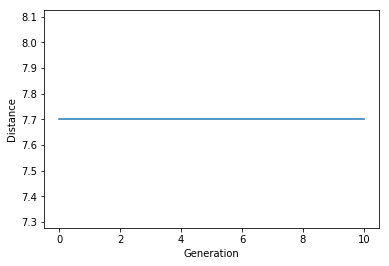

In [ ]:
import numpy as np, random, operator, pandas as pd, matplotlib.pyplot as plt
#import time
#import collections
class City:
    def __init__(self, x, y,cityNo):
        self.x = x
        self.y = y
        # pass city number as well#TA
        self.cityNo = cityNo
    
    def distance(self, city):
        xDis = abs(self.x - city.x)
        yDis = abs(self.y - city.y)
        distance = np.sqrt((xDis ** 2) + (yDis ** 2))
       # print distance
        return distance
    
    def __repr__(self):
        return "(" + str(self.x) + "," + str(self.y) +"," + str(self.cityNo) +  ")"
class fitness:
    def __init__(self,route):
        self.route=route
        self.distance=0
        self.fitness=0.0
    def routeDistance(self):
        if self.distance==0:
            pathDistance=0
            for i in range(0,len(self.route)):
                fromCity=self.route[i]
                toCity=None
                if i+1<len(self.route):
                    toCity=self.route[i+1]
                else:
                    toCity=self.route[0]
                pathDistance+=fromCity.distance(toCity)
            self.distance=pathDistance
            #print('pathDistance:',pathDistance)
        return self.distance
    def routeFitness(self):
        if self.fitness==0:
            self.fitness=1/float(self.routeDistance())
        return self.fitness
    


def createRoute(cityList):
    route1=[]
    route=[]
    route=ant_main()
    route = random.sample(cityList, len(cityList))
    print ('route:',route)
    #print('route1:',route1)
    return route
def initialPopulation(popSize, cityList):
    population = []

    for i in range(0, popSize):
        population.append(createRoute(cityList))
        #print population
    return population


def rankRoutes(population):
    fitnessResults = {}
    for i in range(0,len(population)):
        fitnessResults[i] = fitness(population[i]).routeFitness()
    return sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse = True)
def selection(popRanked, eliteSize):
    selectionResults = []
    df = pd.DataFrame(np.array(popRanked), columns=["Index","Fitness"])
    df['cum_sum'] = df.Fitness.cumsum()
    df['cum_perc'] = 100*df.cum_sum/df.Fitness.sum()
    
    for i in range(0, eliteSize):
        selectionResults.append(popRanked[i][0])
    for i in range(0, len(popRanked) - eliteSize):
        pick = 100*random.random()
        for i in range(0, len(popRanked)):
            if pick <= df.iat[i,3]:
                selectionResults.append(popRanked[i][0])
                break
    #print('selectionResults:',selectionResults)
    return selectionResults
def matingPool(population, selectionResults):
    matingpool = []
    for i in range(0, len(selectionResults)):
        index = selectionResults[i]
        matingpool.append(population[index])
    return matingpool
def crossover(parent1, parent2):
    #print parent1
    child = []
    childP1 = []
    childP2 = []
    
    geneA = int(random.random() * len(parent1))
    geneB = int(random.random() * len(parent1))
    
    startGene = min(geneA, geneB)
    endGene = max(geneA, geneB)

    for i in range(startGene, endGene):
        childP1.append(parent1[i])
        
    childP2 = [item for item in parent2 if item not in childP1]
    child = childP1 + childP2
    #print child
    return child
def crossoverPopulation(matingpool, eliteSize):
    children = []
    length = len(matingpool) - eliteSize
    pool = random.sample(matingpool, len(matingpool))

    for i in range(0,eliteSize):
        children.append(matingpool[i])
    
    for i in range(0, length):
        child = crossover(pool[i], pool[len(matingpool)-i-1])
        children.append(child)
    #print('children:',children)
    return children
def mutate(individual, mutationRate):
    for swapped in range(len(individual)):
        if(random.random() < mutationRate):
            swapWith = int(random.random() * len(individual))
            city1 = individual[swapped]
            city2 = individual[swapWith]
            
            individual[swapped] = city2
            individual[swapWith] = city1
    return individual
#Next, we can extend the mutate function to run through the new population.
def mutatePopulation(population, mutationRate):
    mutatedPop = []
    
    for ind in range(0, len(population)):
        mutatedInd = mutate(population[ind], mutationRate)
        #print population[ind]
        mutatedPop.append(mutatedInd)
    #print mutatedPop
    return mutatedPop
def nextGeneration(currentGen, eliteSize, mutationRate):
    popRanked = rankRoutes(currentGen)
    selectionResults = selection(popRanked, eliteSize)
    matingpool = matingPool(currentGen, selectionResults)
    children = crossoverPopulation(matingpool, eliteSize)
    nextGeneration = mutatePopulation(children, mutationRate)
    return nextGeneration
def geneticAlgorithm(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population)#we capture the initial distance
    print("Initial distance: " + str(1 / rankRoutes(pop)[0][1]))
    
    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
    
    print("Final distance: " + str(1 / rankRoutes(pop)[0][1]))#final distance
    bestRouteIndex = rankRoutes(pop)[0][0]#best distance
    bestRoute = pop[bestRouteIndex]
    # make route with city number and implement it using the original bestRoute array #TA
    bestRouteCity = [] #TA
    for city in bestRoute:#TA
        cityObject = (city.cityNo)#TA
        bestRouteCity.append(cityObject)#TA
    # append the first city in the route to the route itself to start again #TA
    bestRoute.append(bestRoute[0])#TA
    bestRouteCity.append(bestRouteCity[0])#TA
    #print(' bestRoute:',bestRoute)
    print(' bestRoute by city number: ',bestRouteCity)#TA
    return bestRoute




def geneticAlgorithmPlot(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population)
    progress = []
    progress.append(1 / rankRoutes(pop)[0][1])
    
    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
        progress.append(1 / rankRoutes(pop)[0][1])
    
    plt.plot(progress)
    plt.ylabel('Distance')
    plt.xlabel('Generation')
    plt.show()


cityList = []
df = pd.ExcelFile('Core X,Y.xls').parse('Sheet1', namecity=0) # reads file
df.index = df.index.map(int)
b=[tuple(x) for x in df.to_records(index=False)]
#print b
for city1 in b:
    cityList.append(City(city1[1],city1[2],city1[0]))#TA
#print cityList
from scipy.spatial.distance import squareform, pdist # find matrix of distance
#pd.DataFrame(squareform(pdist(df.iloc[:, 1:])), columns=df.numberOfCities.unique(), index=df.numberOfCities.unique())
m=pd.DataFrame(squareform(pdist(df.iloc[:, 1:])), columns=df.numberOfCities.unique(), index=df.numberOfCities.unique())
#print m 
for i in df["numberOfCities"]:
    for j in df["numberOfCities"]:
        row = df[df["numberOfCities"] == j][["self.x=x", "self.y=y"]]
        latitude = row["self.x=x"].tolist()[0]
        longitude = row["self.y=y"].tolist()[0]
        df.loc[df['numberOfCities'] == i, j] = ((df["self.x=x"] - latitude)**2 + (df["self.y=y"] - longitude)**2)**0.5

df = df.drop(["numberOfCities", "self.x=x", "self.y=y"], axis=1)

#for i in range(0,25):
#   cityList.append(City(x=int(random.random() * 200), y=int(random.random() * 200)))
geneticAlgorithm(population=cityList, popSize=8, eliteSize=4, mutationRate=0.01, generations=10)
geneticAlgorithmPlot(population=cityList, popSize=8, eliteSize=4, mutationRate=0.01, generations=10)


In [ ]:
print(edges_acs)
print(tour_acs)
#print(tour_elitist)
#print(tour_maxmin)
#print(label_ga)
#final_ans
x=[]
print(df)
print(dim)
print(b)
data=pd.DataFrame(b, columns=['numberOfCities', 'self.x=x', 'self.y=y'])
print(data)
for i in range(1,len(b)):
  print(i)
  
